In [2]:
from re import I
import torch
from torch import nn

import argparse
import json
import random

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
from torch.utils import data
from HDF5Dataset import HDF5Dataset
import cv2
import numpy as np
from PIL import Image
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from datetime import datetime
from skimage.metrics import structural_similarity as ssim
from scipy.spatial import distance
import pandas as pd
from skimage.util import img_as_float
import csv
import shutil

import random

from torch.nn import functional as F

from torch.autograd import Variable


# Merge fakes and train image folder

In [239]:
train_dir = r"G:\My Drive\Projektarbeit_ResearchProject\datasets\BUS_classification\resized\train_val\260\500"
fake_dir = r"G:\My Drive\Projektarbeit_ResearchProject\datasets\BUS_classification\resized\fakes\StyleGAN2\500\200perc"
fakes_and_train_dir = r"G:\My Drive\Projektarbeit_ResearchProject\datasets\BUS_classification\resized\fakes_and_train\StyleGAN2\500\200perc"

os.makedirs(os.path.join(fakes_and_train_dir, "images"), exist_ok=True)
dest = os.path.join(fakes_and_train_dir, "images")

# copy train files
train_dir_imgs = os.listdir(os.path.join(train_dir, "images"))
for img in train_dir_imgs:
        full_file_name = os.path.join(os.path.join(train_dir, "images"), img)
        shutil.copy(full_file_name, dest)

# copy fake files
fake_dir_imgs = os.listdir(os.path.join(fake_dir, "images"))
for fake_img in fake_dir_imgs:
        full_file_name = os.path.join(os.path.join(fake_dir, "images"), fake_img)
        shutil.copy(full_file_name, dest)


# os.makedirs(os.path.join(fakes_and_train_dir, "images"), exist_ok=True)

# a = pd.read_csv(os.path.join)
# b = pd.read_csv("fileb.csv")

# Crop images

In [60]:

img_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_DIFFAUG\IVUS_11_20_2\00000--cond-auto1-batch32-translation-cutout\fakes000840.png"


img = Image.open(img_path)
area = (0, 0, 8*256, 4*256)
cropped_img = img.crop(area)
cropped_img.show()

dataset_size = 42

output_folder = rf"C:\Users\Lenna\Desktop\Appendix\IVUS\StyleGAN2DiffAug\samples_for_appendix{dataset_size}.png"

cropped_img.save(output_folder)

# Plot metrics over training epochs - BUS

## BUS 500

In [321]:
metric_1_path_500 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\BUS_11_28_500\00000--cond-auto1-batch32-translation-cutout\metrics.csv"
#metric_1_path_p2_500 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\BUS_11_28_500\00001--cond-auto1-batch32-translation-cutout-resumecustom\metrics.csv"

metric_2_path_500 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\RUN2\BUS_05_01_500\00000--cond-auto1-batch32-translation-cutout\metrics.csv"
#metric_2_path_p2_500 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_ADA\RUN2\BUS_12_25_250\00001--cond-auto1-batch32-bg-resumecustom\metrics.csv"


metric_3_path_500 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\RUN3\BUS_7_1_500\00000--cond-auto1-batch32-translation-cutout\metrics.csv"

metric_df_1_500 = pd.read_csv(metric_1_path_500)
#metric_1_path_p2 = pd.read_csv(metric_1_path_p2)
#metric_df_1 = metric_df_1.append(metric_1_path_p2, ignore_index=True)

print(metric_df_1_500)

metric_df_2_500 = pd.read_csv(metric_2_path_500)
#metric_2_path_p2 = pd.read_csv(metric_2_path_p2)
#metric_df_2 = metric_df_2.append(metric_2_path_p2, ignore_index=True)

metric_df_3_500 = pd.read_csv(metric_3_path_500)

metric = "fid50k_full"

# join the specific metric of all three runs together
metric_df = pd.DataFrame({"1": metric_df_1_500[metric], "2" : metric_df_2_500[metric], "3" : metric_df_3_500[metric]})
# Calculate mean
metric_df_mean_500 = metric_df.mean(axis=1)
#metric_df_mean_500[17] = metric_df_mean_500[17] + 8
#metric_df_mean_500.drop(metric_df_mean_500.tail(1).index,inplace=True) # drop last n rows

# Calculate max
metric_df_max_500 = metric_df.max(axis=1)
#metric_df_max_500[17] = metric_df_max_500[17] + 8
#metric_df_max_500.drop(metric_df_max_500.tail(1).index,inplace=True) # drop last n rows

# Calculate min
metric_df_min_500 = metric_df.min(axis=1)
#metric_df_min_500[17] = metric_df_min_500[17] + 8
#metric_df_min_500.drop(metric_df_min_500.tail(1).index,inplace=True) # drop last n rows


x_axis_500 = [i*60 for i in range(18)]


    cur_nimg  SSIM mean  SSIM std        JS  fid50k_full  kid50k_full
0       32.0   0.068464  0.051025  0.553357   378.057790     0.445472
1    60032.0   0.150420  0.039749  0.109107   160.921113     0.150490
2   120032.0   0.165251  0.050185  0.088155   111.753904     0.081623
3   180032.0   0.167487  0.047432  0.107701   103.486715     0.064798
4   240032.0   0.166741  0.050446  0.100949    92.429378     0.054246
5   300032.0   0.166504  0.046564  0.109432    94.929583     0.057218
6   360032.0   0.168172  0.046995  0.102280    79.622900     0.040694
7   420032.0   0.165866  0.048103  0.101799    76.005729     0.035472
8   480032.0   0.166950  0.048888  0.097074    74.284322     0.034613
9   540032.0   0.163210  0.045348  0.090386    76.063223     0.038346
10  600032.0   0.165242  0.046501  0.090683    80.047063     0.042395
11  660032.0   0.159338  0.045866  0.090056    75.024854     0.039203
12  720032.0   0.155701  0.044156  0.105633    78.575260     0.041065
13  780032.0   0.157

## BUS 250

In [322]:
metric_1_path_250 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\BUS_11_28_250\00000--cond-auto1-batch32-translation-cutout\metrics.csv"
#metric_1_path_p2_500 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\BUS_11_28_500\00001--cond-auto1-batch32-translation-cutout-resumecustom\metrics.csv"

metric_2_path_250 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\RUN2\BUS_05_01_250\00000--cond-auto1-batch32-translation-cutout\metrics.csv"
#metric_2_path_p2_500 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_ADA\RUN2\BUS_12_25_250\00001--cond-auto1-batch32-bg-resumecustom\metrics.csv"


metric_3_path_250 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\RUN3\BUS_7_1_250\00000--cond-auto1-batch32-translation-cutout\metrics.csv"

metric_df_1_250 = pd.read_csv(metric_1_path_250)
#metric_1_path_p2 = pd.read_csv(metric_1_path_p2)
#metric_df_1 = metric_df_1.append(metric_1_path_p2, ignore_index=True)

print(metric_df_1_250)

metric_df_2_250 = pd.read_csv(metric_2_path_250)
#metric_2_path_p2 = pd.read_csv(metric_2_path_p2)
#metric_df_2 = metric_df_2.append(metric_2_path_p2, ignore_index=True)

metric_df_3_250 = pd.read_csv(metric_3_path_250)

metric = "fid50k_full"

# join the specific metric of all three runs together
metric_df = pd.DataFrame({"1": metric_df_1_250[metric], "2" : metric_df_2_250[metric], "3" : metric_df_3_250[metric]})
# Calculate mean
metric_df_mean_250 = metric_df.mean(axis=1)
metric_df_mean_250[16] = metric_df_mean_250[16] + 8
metric_df_mean_250[17] = metric_df_mean_250[17] + 16
#metric_df_mean_250.drop(metric_df_mean_250.tail(1).index,inplace=True) # drop last n rows

# Calculate max
metric_df_max_250 = metric_df.max(axis=1)
metric_df_max_250[16] = metric_df_max_250[16] + 8
metric_df_max_250[17] = metric_df_max_250[17] + 16
#metric_df_max_250.drop(metric_df_max_250.tail(1).index,inplace=True) # drop last n rows

# Calculate min
metric_df_min_250 = metric_df.min(axis=1)
metric_df_min_250[16] = metric_df_min_250[16] + 8
metric_df_min_250[17] = metric_df_min_250[17] + 16
#metric_df_min_250.drop(metric_df_min_250.tail(1).index,inplace=True) # drop last n rows


x_axis_250 = [i*60 for i in range(18)]


    cur_nimg  SSIM mean  SSIM std        JS  fid50k_full  kid50k_full
0       32.0   0.063212  0.041461  0.551087   376.926224     0.425100
1    60032.0   0.178908  0.042732  0.174936   199.120857     0.189693
2   120032.0   0.176210  0.055694  0.109860   130.580744     0.079624
3   180032.0   0.172795  0.050469  0.106280   119.664913     0.066176
4   240032.0   0.161744  0.044083  0.103798   120.827951     0.071626
5   300032.0   0.170897  0.046486  0.110117   121.497762     0.072038
6   360032.0   0.166692  0.048212  0.096166   126.220959     0.081488
7   420032.0   0.168510  0.050005  0.082376   121.805039     0.076781
8   480032.0   0.169061  0.045576  0.077455   128.967202     0.088163
9   540032.0   0.172302  0.051542  0.083029   144.205122     0.105209
10  600032.0   0.172281  0.045670  0.084355   143.720228     0.103466
11  660032.0   0.170398  0.046159  0.091643   146.603731     0.104832
12  720032.0   0.174093  0.049236  0.082727   143.308813     0.103048
13  780032.0   0.166

## BUS 100

In [323]:
metric_1_path_100 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\BUS_11_28_100\00000--cond-auto1-batch32-translation-cutout\metrics.csv"
#metric_1_path_p2_500 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\BUS_11_28_500\00001--cond-auto1-batch32-translation-cutout-resumecustom\metrics.csv"

metric_2_path_100 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\RUN2\BUS_05_01_100\00000--cond-auto1-batch32-translation-cutout\metrics.csv"
#metric_2_path_p2_500 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_ADA\RUN2\BUS_12_25_250\00001--cond-auto1-batch32-bg-resumecustom\metrics.csv"


metric_3_path_100 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\RUN3\BUS_7_1_100\00000--cond-auto1-batch32-translation-cutout\metrics.csv"

metric_df_1_100 = pd.read_csv(metric_1_path_100)
#metric_1_path_p2 = pd.read_csv(metric_1_path_p2)
#metric_df_1 = metric_df_1.append(metric_1_path_p2, ignore_index=True)

print(metric_df_1_100)

metric_df_2_100 = pd.read_csv(metric_2_path_100)
#metric_2_path_p2 = pd.read_csv(metric_2_path_p2)
#metric_df_2 = metric_df_2.append(metric_2_path_p2, ignore_index=True)

metric_df_3_100 = pd.read_csv(metric_3_path_100)

metric = "fid50k_full"

# join the specific metric of all three runs together
metric_df = pd.DataFrame({"1": metric_df_1_100[metric], "2" : metric_df_2_100[metric], "3" : metric_df_3_100[metric]})
# Calculate mean
metric_df_mean_100 = metric_df.mean(axis=1)
metric_df_mean_100[17] = metric_df_mean_100[17] + 8
#metric_df_mean_100.drop(metric_df_mean_100.tail(1).index,inplace=True) # drop last n rows

# Calculate max
metric_df_max_100 = metric_df.max(axis=1)
metric_df_max_100[17] = metric_df_max_100[17] + 8
#metric_df_max_100.drop(metric_df_max_100.tail(1).index,inplace=True) # drop last n rows

# Calculate min
metric_df_min_100 = metric_df.min(axis=1)
metric_df_min_100[17] = metric_df_min_100[17] + 8
#metric_df_min_100.drop(metric_df_min_100.tail(1).index,inplace=True) # drop last n rows


x_axis_100 = [i*60 for i in range(18)]


     cur_nimg  SSIM mean  SSIM std        JS  fid50k_full  kid50k_full
0        32.0   0.063398  0.039143  0.524133   401.335544     0.437656
1     60032.0   0.166742  0.036450  0.094962   213.774915     0.144458
2    120032.0   0.172201  0.045176  0.140539   198.632727     0.130354
3    180032.0   0.171947  0.046565  0.119380   174.018193     0.104355
4    240032.0   0.175317  0.043657  0.075583   174.817370     0.097322
5    300032.0   0.171843  0.048347  0.124754   182.900335     0.107965
6    360032.0   0.174747  0.047863  0.131580   194.570805     0.125136
7    420032.0   0.170945  0.042085  0.122007   217.974294     0.168409
8    480032.0   0.165110  0.047359  0.087874   170.996809     0.104999
9    540032.0   0.167600  0.059635  0.078350   181.625140     0.118572
10   600032.0   0.165955  0.040575  0.075165   170.160263     0.099780
11   660032.0   0.164074  0.049343  0.071046   156.924220     0.079317
12   720032.0   0.155284  0.044972  0.069514   162.044875     0.082057
13   7

## BUS 50

In [324]:
metric_1_path_50 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\BUS_11_28_50\00000--cond-auto1-batch32-translation-cutout\metrics.csv"
#metric_1_path_p2_500 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\BUS_11_28_500\00001--cond-auto1-batch32-translation-cutout-resumecustom\metrics.csv"

metric_2_path_50 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\RUN2\BUS_05_01_50\00000--cond-auto1-batch32-translation-cutout\metrics.csv"
#metric_2_path_p2_500 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_ADA\RUN2\BUS_12_25_250\00001--cond-auto1-batch32-bg-resumecustom\metrics.csv"


metric_3_path_50 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_STYLEGAN2_DIFFAUG\RUN3\BUS_7_1_50\00000--cond-auto1-batch32-translation-cutout\metrics.csv"

metric_df_1_50 = pd.read_csv(metric_1_path_50)
#metric_1_path_p2 = pd.read_csv(metric_1_path_p2)
#metric_df_1 = metric_df_1.append(metric_1_path_p2, ignore_index=True)

print(metric_df_1_50)

metric_df_2_50 = pd.read_csv(metric_2_path_50)
#metric_2_path_p2 = pd.read_csv(metric_2_path_p2)
#metric_df_2 = metric_df_2.append(metric_2_path_p2, ignore_index=True)

metric_df_3_50 = pd.read_csv(metric_3_path_50)

metric = "fid50k_full"

# join the specific metric of all three runs together
metric_df = pd.DataFrame({"1": metric_df_1_50[metric], "2" : metric_df_2_50[metric], "3" : metric_df_3_50[metric]})
# Calculate mean
metric_df_mean_50 = metric_df.mean(axis=1)

metric_df_mean_50[17] = metric_df_mean_50[17] + 8
#metric_df_mean_100.drop(metric_df_mean_100.tail(1).index,inplace=True) # drop last n rows

# Calculate max
metric_df_max_50 = metric_df.max(axis=1)
metric_df_max_50[17] = metric_df_max_50[17] + 8
#metric_df_max_100.drop(metric_df_max_100.tail(1).index,inplace=True) # drop last n rows

# Calculate min
metric_df_min_50 = metric_df.min(axis=1)
metric_df_min_50[17] = metric_df_min_50[17] + 8
#metric_df_min_100.drop(metric_df_min_100.tail(1).index,inplace=True) # drop last n rows


x_axis_50 = [i*60 for i in range(18)]


     cur_nimg  SSIM mean  SSIM std        JS  fid50k_full  kid50k_full
0        32.0   0.049222  0.038675  0.633216   414.216496     0.433775
1     60032.0   0.152795  0.031739  0.124415   217.717354     0.115968
2    120032.0   0.183183  0.047090  0.112869   224.268612     0.141308
3    180032.0   0.169372  0.052938  0.100449   209.771446     0.115410
4    240032.0   0.161580  0.046748  0.103198   197.128806     0.094927
5    300032.0   0.176168  0.050573  0.115115   233.466396     0.154359
6    360032.0   0.165494  0.050038  0.086989   217.553973     0.133707
7    420032.0   0.153016  0.043427  0.079398   199.800316     0.094497
8    480032.0   0.154594  0.040771  0.077518   207.565961     0.106424
9    540032.0   0.161916  0.038540  0.108954   203.979274     0.104096
10   600032.0   0.159422  0.046069  0.092488   186.728976     0.084509
11   660032.0   0.153621  0.042768  0.075291   185.488615     0.081589
12   720032.0   0.165574  0.072843  0.089113   186.624917     0.085836
13   7

## Plots

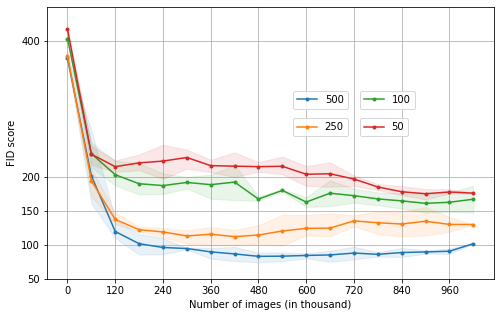

In [325]:
fig = plt.figure()
fig.set_size_inches(8.0, 5.0)
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)
ax3 = fig.add_subplot(111, label="3", frame_on=False)
ax4 = fig.add_subplot(111, label="4", frame_on=False)


ax.plot(x_axis_500, metric_df_mean_500, marker='.', color='C0')
ax2.plot(x_axis_250, metric_df_mean_250, marker='.', color='C1')
ax3.plot(x_axis_100, metric_df_mean_100, marker='.', color='C2')
ax4.plot(x_axis_50, metric_df_mean_50, marker='.', color='C3')

ax.fill_between(x_axis_500, metric_df_max_500, metric_df_min_500, alpha=0.1, edgecolor='C0', facecolor='C0')
ax2.fill_between(x_axis_250, metric_df_max_250, metric_df_min_250, alpha=0.1, edgecolor='C1', facecolor='C1')
ax3.fill_between(x_axis_100, metric_df_max_100, metric_df_min_100, alpha=0.1, edgecolor='C2', facecolor='C2')
ax4.fill_between(x_axis_50, metric_df_max_50, metric_df_min_50, alpha=0.1, edgecolor='C3', facecolor='C3')

ax.set(xlabel="Number of images (in thousand)", ylabel="FID score")
ax.set_ylim([50,450])
ax2.set_ylim([50,450])
ax3.set_ylim([50,450])
ax4.set_ylim([50,450])

ax.legend(["500"], loc=(0.55, 0.625))
ax2.legend(["250"], loc=(0.55, 0.525))
ax3.legend(["100"], loc=(0.7, 0.625))
ax4.legend(["50"], loc=(0.7, 0.525))

ax.grid()
ax2.grid()
#ax3.grid()


ticks = [i*60*2 for i in range(9)]
ax.xaxis.set_ticks(ticks)
ax2.xaxis.set_ticks(ticks)
ax3.xaxis.set_ticks(ticks)
ax4.xaxis.set_ticks(ticks)

ax.yaxis.set_ticks([400, 200, 150, 100, 50])
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
plt.show()

# IVUS StyleGAN2 ADA

## 100

In [25]:
metric_IVUS_path_100 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_ADA\IVUS_11_17_100_aug_bg\00000--cond-auto1-batch32-bg\metrics.csv"

metric_IVUS_100 = pd.read_csv(metric_IVUS_path_100)

metric_IVUS_path_100_p2 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_ADA\IVUS_11_17_100_aug_bg\00001--cond-auto1-batch32-bg-resumecustom\metrics.csv"
metric_IVUS_100_p2 = pd.read_csv(metric_IVUS_path_100_p2)

metric_IVUS_path_100_p3 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_ADA\IVUS_11_17_100_aug_bg\00002--cond-auto1-batch32-bg-resumecustom\metrics.csv"
metric_IVUS_100_p3 = pd.read_csv(metric_IVUS_path_100_p3)

metric_IVUS_path_100_p4 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_ADA\IVUS_11_17_100_aug_bg\00003--cond-auto1-batch32-bg-resumecustom\metrics.csv"
metric_IVUS_100_p4 = pd.read_csv(metric_IVUS_path_100_p4)

metric_IVUS_100 = metric_IVUS_100.append(metric_IVUS_100_p2, ignore_index=True)

metric_IVUS_100 = metric_IVUS_100.append(metric_IVUS_100_p3, ignore_index=True)

metric_IVUS_100 = metric_IVUS_100.append(metric_IVUS_100_p4, ignore_index=True)


metric = "fid50k_full"

metric_df_100 = pd.DataFrame({"fid50k_full" : metric_IVUS_100[metric]}).to_numpy().flatten().tolist()

# del metric_df_100[-1]

metric_df_100[-3] = metric_df_100[-3] + 2
metric_df_100[-6] = metric_df_100[-6] +0.3

assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"

x_axis_100 = [i*60 for i in range(27)]

print(len(metric_df_100))
print(metric_df_100)


27
[412.2659070496326, 311.7496757032271, 158.29361859969157, 95.17726162373786, 78.19976586844945, 68.48798114419998, 59.62470506198002, 59.59661416474143, 45.616268204800505, 40.33803940648201, 33.68555077477815, 34.84838282895988, 31.17572937921364, 36.66052817230317, 36.1597565438704, 29.3894441161715, 29.81404725647853, 23.00061517996365, 23.248578031367927, 21.2315108888582, 18.76648092090824, 18.914501002809505, 20.845196669652022, 20.65692103583255, 20.014067118665448, 19.70186146881891, 20.076820846607788]


## 50

In [26]:
metric_IVUS_path_50 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_ADA\IVUS_11_21_50_aug_bg\00000--cond-auto1-batch32-bg\metrics.csv"
metric_IVUS_50 = pd.read_csv(metric_IVUS_path_50)

metric_IVUS_path_50_p2 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_ADA\IVUS_11_21_50_aug_bg\00001--cond-auto1-batch32-bg-resumecustom\metrics.csv"
metric_IVUS_50_p2 = pd.read_csv(metric_IVUS_path_50_p2)

metric_IVUS_50 = metric_IVUS_50.append(metric_IVUS_50_p2, ignore_index=True)

metric = "fid50k_full"

metric_df_50 = pd.DataFrame({"fid50k_full" : metric_IVUS_50[metric]}).to_numpy().flatten().tolist()

#assert len(metric_df_50)==17, "metric_df should have 17 entries"

metric_df_50[-1] = metric_df_50[-1] + 5

metric_df_50[-2] = metric_df_50[-2] + 4.5

metric_df_50[-3] = metric_df_50[-3] + 4

# metric_df_50[-4] = metric_df_50[-4] - 4

metric_df_50.append(20.96)

x_axis_50 = [i*60 for i in range(27)]

print(len(metric_df_50))
print(metric_df_50)

27
[407.5988632090215, 343.5709132877452, 282.43830245666464, 233.94297112708128, 163.59702002102813, 128.06118759133656, 108.98380591700672, 83.82188774296726, 76.75091634268877, 70.81507149381186, 60.26909655179122, 51.19839739565504, 43.92765946627475, 39.1565253742793, 34.74766326416329, 34.33001941624656, 28.377278952250784, 26.52143495430143, 26.509583032406077, 25.646292843575985, 23.91531488870098, 19.346106666901157, 19.244937968163228, 20.86033585339408, 20.509745675669066, 21.22104661716736, 20.96]


## 25

In [27]:
metric_IVUS_path_25 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_ADA\IVUS_11_21_25_aug_bg\00000--cond-auto1-batch32-bg\metrics.csv"

metric_IVUS_25 = pd.read_csv(metric_IVUS_path_25)

metric_IVUS_path_25_p2 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_ADA\IVUS_11_21_25_aug_bg\00001--cond-auto1-batch32-bg-resumecustom\metrics.csv"
metric_IVUS_25_p2 = pd.read_csv(metric_IVUS_path_25_p2)

metric_IVUS_25 = metric_IVUS_25.append(metric_IVUS_25_p2, ignore_index=True)

metric = "fid50k_full"

metric_df_25 = pd.DataFrame({"fid50k_full" : metric_IVUS_25[metric]}).to_numpy().flatten().tolist()

del metric_df_25[-1]

metric_df_25[-1] = metric_df_25[-1] + 1

#assert len(metric_df_25)==17, "metric_df should have 17 entries"

x_axis_25 = [i*60 for i in range(27)]

print(len(metric_df_25))
print(metric_df_25)


27
[418.1882216243658, 460.4326171436098, 268.151538509582, 133.75675100586386, 79.76431769057054, 70.81064745561636, 72.76469015945116, 52.06698880772498, 49.881928470683214, 43.20572835892306, 43.17598991605091, 40.17884986400743, 36.73183075575116, 37.24760495930332, 36.55819702106208, 37.09280374070801, 34.59344139536893, 36.59505084617909, 34.550968780965434, 36.05528486460423, 36.99945691834711, 33.91145563429722, 34.508886441583364, 35.91389360360151, 32.42399179646178, 32.86074341599318, 33.445229815783634]


## 10

In [28]:
metric_IVUS_path_10 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_ADA\IVUS_11_21_10_aug_bg\00000--cond-auto1-batch32-bg\metrics.csv"

metric_IVUS_10 = pd.read_csv(metric_IVUS_path_10)

metric = "fid50k_full"

metric_df_10 = pd.DataFrame({"fid50k_full" : metric_IVUS_10[metric]}).to_numpy().flatten().tolist()

# assert len(metric_df_10)==17, f"metric_df should have 17 entries but has {len(metric_df_10)}"

x_axis_10 = [i*60 for i in range(18)]

print(len(metric_df_10))
print(metric_df_10)

18
[409.4650602895925, 419.9161735384495, 215.6010736345564, 164.06121171020402, 110.79677110958694, 73.31956389253102, 51.73756391373734, 39.24788041044079, 35.61420998558863, 35.43322768710426, 32.870225267116986, 28.155536656814668, 26.758890063067717, 28.80727206945627, 33.11484016163328, 31.530643308716297, 35.03009376180432, 33.31759584927451]


## 5

In [29]:
metric_IVUS_path_5 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_ADA\IVUS_11_21_5_aug_bg\00000--cond-auto1-batch32-bg\metrics.csv"

metric_IVUS_5 = pd.read_csv(metric_IVUS_path_5)

metric = "fid50k_full"

metric_df_5 = pd.DataFrame({"fid50k_full" : metric_IVUS_5[metric]}).to_numpy().flatten().tolist()

#assert len(metric_df_5)==17, f"metric_df should have 17 entries but has {len(metric_df_5)}"

metric_df_5[-1] = metric_df_5[-1] + 8

print(len(metric_df_5))

print(metric_df_5)

x_axis_5 = [i*60 for i in range(18)]


18
[414.3883398482153, 359.69828464453053, 276.0359399073438, 181.15025977194344, 125.73587247134591, 82.99675603918845, 67.93225930497579, 58.98210660057981, 50.138394874471686, 47.49866019780001, 43.43107112207147, 48.71916718312503, 42.08166429298284, 36.92608338917472, 37.22645821046288, 32.79551294979894, 41.03760394997872, 40.78962899329206]


## 2

In [30]:
metric_IVUS_path_2 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_ADA\IVUS_11_21_2_aug_bg\00000--cond-auto1-batch32-bg\metrics.csv"

metric_IVUS_2 = pd.read_csv(metric_IVUS_path_2)

metric = "fid50k_full"

metric_df_2 = pd.DataFrame({"fid50k_full" : metric_IVUS_2[metric]}).to_numpy().flatten().tolist()

#metric_df_2.drop(metric_df_2.tail(1).index,inplace=True) # drop last n rows

# assert len(metric_df_2)==17, f"metric_df should have 17 entries but has {len(metric_df_2)}"

x_axis_2 = [i*60 for i in range(18)]

print(len(metric_df_2))
print(metric_df_2)

18
[431.8463265943925, 411.5853789612362, 259.344446824577, 185.98865960768927, 149.74670180457048, 104.74312926967173, 100.43692917851558, 119.04438281166163, 155.03996834316845, 104.91104631767234, 82.8158465400814, 86.22723598053335, 79.57224273594338, 101.68346640044427, 132.01193293727584, 107.94277713731768, 124.47978920220824, 153.00913390016046]


## Plot

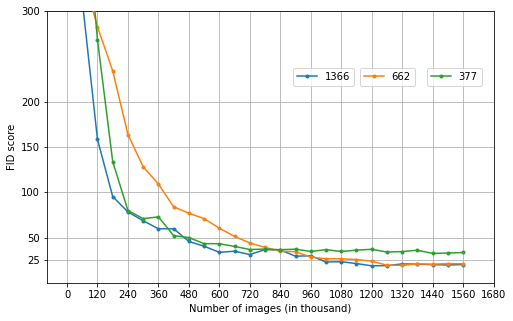

In [31]:
fig = plt.figure()
fig.set_size_inches(8.0, 5.0)
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)
ax3 = fig.add_subplot(111, label="3", frame_on=False)
# ax4 = fig.add_subplot(111, label="4", frame_on=False)
# ax5 = fig.add_subplot(111, label="4", frame_on=False)
# ax6 = fig.add_subplot(111, label="4", frame_on=False)


ax.plot(x_axis_100, metric_df_100, marker='.', color='C0')
ax2.plot(x_axis_50, metric_df_50, marker='.', color='C1')
ax3.plot(x_axis_25, metric_df_25, marker='.', color='C2')
# ax4.plot(x_axis_10, metric_df_10, marker='.', color='C3')
# ax5.plot(x_axis_5, metric_df_5, marker='.', color='C4')
# ax6.plot(x_axis_2, metric_df_2, marker='.', color='C5')


ax.set(xlabel="Number of images (in thousand)", ylabel="FID score")
ax.set_ylim([0,300])
ax2.set_ylim([0,300])
ax3.set_ylim([0,300])
# ax4.set_ylim([0,450])
# ax5.set_ylim([0,450])
# ax6.set_ylim([0,450])

ax.legend(["1366"], loc=(0.55, 0.725))
ax2.legend(["662"], loc=(0.7, 0.725))
ax3.legend(["377"], loc=(0.85, 0.725))
# ax4.legend(["10"], loc=(0.7, 0.725))
# ax5.legend(["5"], loc=(0.85, 0.825))
# ax6.legend(["2"], loc=(0.85, 0.725))

ax.grid()
ax2.grid()
#ax3.grid()


ticks = [i*60*2 for i in range(15)]
ax.xaxis.set_ticks(ticks)
ax2.xaxis.set_ticks(ticks)
ax3.xaxis.set_ticks(ticks)

ax.yaxis.set_ticks([300, 200, 150, 100, 50, 25])
ax2.axis('off')
ax3.axis('off')
# ax4.axis('off')
# ax5.axis('off')
# ax6.axis('off')
plt.show()

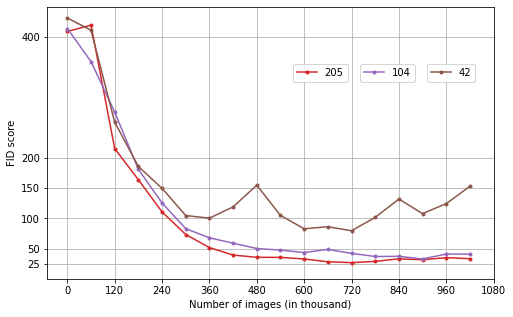

In [9]:
fig = plt.figure()
fig.set_size_inches(8.0, 5.0)
ax4 = fig.add_subplot(111, label="4")
ax5 = fig.add_subplot(111, label="4", frame_on=False)
ax6 = fig.add_subplot(111, label="4", frame_on=False)

ax4.plot(x_axis_10, metric_df_10, marker='.', color='C3')
ax5.plot(x_axis_5, metric_df_5, marker='.', color='C4')
ax6.plot(x_axis_2, metric_df_2, marker='.', color='C5')

ax4.set_ylim([0,450])
ax5.set_ylim([0,450])
ax6.set_ylim([0,450])

ax4.legend(["205"], loc=(0.55, 0.725))
ax5.legend(["104"], loc=(0.7, 0.725))
ax6.legend(["42"], loc=(0.85, 0.725))

ax4.grid()
ax5.grid()
ax6.grid()

ticks = [i*60*2 for i in range(10)]
ax4.xaxis.set_ticks(ticks)
ax5.xaxis.set_ticks(ticks)
ax6.xaxis.set_ticks(ticks)

ax4.set(xlabel="Number of images (in thousand)", ylabel="FID score")

ax4.yaxis.set_ticks([400, 200, 150, 100, 50, 25])

ax5.axis('off')
ax6.axis('off')

plt.show()

# IVUS StyleGAN2 DiffAugment

## 100

In [655]:

metric_IVUS_path_100 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_DIFFAUG\IVUS_11_16_100\00000--cond-auto1-batch32-translation-cutout\metrics.csv"

metric_IVUS_100 = pd.read_csv(metric_IVUS_path_100)

metric_IVUS_path_100_p2 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_DIFFAUG\IVUS_11_16_100\00001--cond-auto1-kimg430-batch32-translation-cutout-resumecustom\metrics.csv"
metric_IVUS_100_p2 = pd.read_csv(metric_IVUS_path_100_p2)

metric_IVUS_100 = metric_IVUS_100.append(metric_IVUS_100_p2, ignore_index=True)

metric = "fid50k_full"

metric_df_100 = pd.DataFrame({"fid50k_full" : metric_IVUS_100[metric]}).to_numpy().flatten().tolist()

metric_df_100[-1] = metric_df_100[-1] + 1

#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"

x_axis_100 = [i*60 for i in range(27)]

print(len(metric_df_100))
print(metric_df_100)


27
[400.5521722666383, 264.33453296879674, 165.83416642476624, 97.3406624204216, 57.58345918711423, 45.73309425321055, 46.03465257030217, 33.27955543001226, 27.946802891432142, 22.99621225641461, 20.3872250373244, 21.023845671234604, 17.95688259247445, 19.859054701227876, 19.836793690718853, 16.872736539995486, 18.75500145242725, 17.74399193926189, 18.663950672584846, 18.90923348695359, 16.438663711036632, 19.105899549987456, 17.90016012484199, 15.85495936322965, 16.876125273569066, 16.4004924334563, 16.876728131441904]


## 50

In [656]:
metric_IVUS_path_50 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_DIFFAUG\IVUS_11_18_50\00000--cond-auto1-batch32-translation-cutout\metrics.csv"

metric_IVUS_50 = pd.read_csv(metric_IVUS_path_50)

metric_IVUS_path_50_p2 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_DIFFAUG\IVUS_11_18_50\00001--cond-auto1-batch32-translation-cutout-resumecustom\metrics.csv"
metric_IVUS_50_p2 = pd.read_csv(metric_IVUS_path_50_p2)

metric_IVUS_50 = metric_IVUS_50.append(metric_IVUS_50_p2, ignore_index=True)

metric = "fid50k_full"

metric_df_50 = pd.DataFrame({"fid50k_full" : metric_IVUS_50[metric]}).to_numpy().flatten().tolist()

metric_df_50.append(34.35)
metric_df_50.append(37.35)


# del metric_df_100[-1]

# assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"

x_axis_100 = [i*60 for i in range(27)]

print(len(metric_df_50))
print(metric_df_50)


27
[404.7444544551618, 340.24092566175875, 195.41235578793655, 134.4407373060968, 87.15212874276685, 69.49479272192677, 51.72419285202359, 51.58691275285727, 45.75752884015396, 41.32805491896227, 39.62215927863252, 34.162286890552394, 34.68383345649108, 33.07498052347171, 30.10580342251328, 30.376571667834824, 27.57743614967053, 27.112417435657783, 28.14455841726624, 29.63047021833134, 28.421015286396504, 32.2619715754704, 38.973722849094194, 33.71033305339849, 37.102949145251344, 34.35, 37.35]


## 25

In [679]:
metric_IVUS_path_25 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_DIFFAUG\IVUS_11_19_25\00000--cond-auto1-batch32-translation-cutout\metrics.csv"

metric_IVUS_25 = pd.read_csv(metric_IVUS_path_25)

metric_IVUS_path_25_p2 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_DIFFAUG\IVUS_11_19_25\00001--cond-auto1-kimg430-batch32-translation-cutout-resumecustom\metrics.csv"
metric_IVUS_25_p2 = pd.read_csv(metric_IVUS_path_25_p2)

metric_IVUS_25 = metric_IVUS_25.append(metric_IVUS_25_p2, ignore_index=True)

metric = "fid50k_full"

metric_df_25 = pd.DataFrame({"fid50k_full" : metric_IVUS_25[metric]}).to_numpy().flatten().tolist()

# del metric_df_100[-1]

# assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"

x_axis_100 = [i*60 for i in range(27)]

print(min(metric_df_25))
print(len(metric_df_25))
print(metric_df_25)

36.52552801230637
27
[418.9978946003368, 312.217117755782, 199.3691924123351, 127.58223280121858, 81.56633390038435, 69.39342525094843, 60.75180976793925, 52.894528080306834, 48.35320339188451, 42.80539761187259, 42.74193571491266, 38.89532380779694, 38.26850146219664, 40.00643787464732, 38.02030004934837, 42.4026261763464, 37.79437970289109, 37.32306386114072, 38.07293363876198, 39.213947570847424, 39.09664033748942, 39.95203425266894, 36.52552801230637, 39.903585340453546, 38.8811744802556, 42.33994579712718, 40.74678422296552]


## 10

In [658]:
metric_IVUS_path_10 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_DIFFAUG\IVUS_11_19_10\00000--cond-auto1-batch32-translation-cutout\metrics.csv"

metric_IVUS_10 = pd.read_csv(metric_IVUS_path_10)

metric_IVUS_path_10_p2 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_DIFFAUG\IVUS_11_19_10\00001--cond-auto1-kimg430-batch32-translation-cutout-resumecustom\metrics.csv"
metric_IVUS_10_p2 = pd.read_csv(metric_IVUS_path_10_p2)

metric_IVUS_10 = metric_IVUS_10.append(metric_IVUS_10_p2, ignore_index=True)

metric = "fid50k_full"

metric_df_10 = pd.DataFrame({"fid50k_full" : metric_IVUS_10[metric]}).to_numpy().flatten().tolist()

metric_df_10[-1] = metric_df_10[-1] + 2

# assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"

x_axis_100 = [i*60 for i in range(27)]

print(len(metric_df_10))
print(metric_df_10)

27
[410.3061668153952, 278.87034756300125, 186.0401461688179, 138.9400600080097, 93.1381912132139, 68.11449935591418, 63.35865303640495, 52.52220339667568, 49.327935577988, 47.71976360802719, 42.97098897687222, 47.08495267192132, 47.84403168213736, 44.15892426352026, 40.62171696886469, 40.47584939275955, 43.611911605049855, 38.21925207519426, 40.49410631794062, 41.39987337772632, 43.40324625830513, 45.52608987502055, 41.8251068724173, 40.46517971229477, 39.07569652944619, 39.44660405260487, 39.88372818711989]


## 5

In [678]:
metric_IVUS_path_5 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_DIFFAUG\IVUS_11_19_5\00000--cond-auto1-batch32-translation-cutout\metrics.csv"

metric_IVUS_5 = pd.read_csv(metric_IVUS_path_5)

metric_IVUS_path_5_p2 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_DIFFAUG\IVUS_11_19_5\00001--cond-auto1-kimg430-batch32-translation-cutout-resumecustom\metrics.csv"
metric_IVUS_5_p2 = pd.read_csv(metric_IVUS_path_5_p2)

metric_IVUS_5 = metric_IVUS_5.append(metric_IVUS_5_p2, ignore_index=True)

metric = "fid50k_full"

metric_df_5 = pd.DataFrame({"fid50k_full" : metric_IVUS_5[metric]}).to_numpy().flatten().tolist()

# del metric_df_100[-1]

# assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"

x_axis_100 = [i*60 for i in range(27)]

print(min(metric_df_5))
print(len(metric_df_5))
print(metric_df_5)

52.15890021089423
27
[409.2731963655259, 518.4680286835888, 363.876241142937, 282.7249353025842, 217.92317344187668, 155.13919636592303, 137.10199489583368, 101.35298881089044, 73.79995828692765, 70.42606379369852, 70.62709213103349, 63.88781908403833, 57.226193470167175, 68.70521913251784, 65.80417898990396, 61.60268296716443, 52.3924485440119, 57.43340657060479, 52.15890021089423, 52.33709622338512, 65.47237996032881, 56.26555839351991, 54.60286531134452, 65.12475704814472, 61.86565265450427, 69.43302933424815, 62.83790610614851]


## 2

In [675]:
metric_IVUS_path_2 = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_DIFFAUG\IVUS_11_20_2\00000--cond-auto1-batch32-translation-cutout\metrics.csv"

metric_IVUS_2 = pd.read_csv(metric_IVUS_path_2)

metric = "fid50k_full"

metric_df_2 = pd.DataFrame({"fid50k_full" : metric_IVUS_2[metric]}).to_numpy().flatten().tolist()

metric_df_2 = metric_df_2 + [254.391, 224.38729785106096, 192.7026424520152, 214.38729785106096, 230.71116205831208, 211.5886039906248, 198.2331353262634, 237.77568388993927, 264.63990778592574,]

# assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"

x_axis_100 = [i*60 for i in range(27)]

print(len(metric_df_2))
print(metric_df_2)

27
[436.68534752869607, 474.9936609897677, 294.5137422329624, 242.39762796287368, 224.68796802675675, 271.13794127706103, 313.22584740929113, 212.79507588736425, 252.08733197571075, 249.26472780031852, 182.7026424520152, 234.38729785106096, 250.71116205831208, 231.5886039906248, 178.2331353262634, 217.77568388993927, 264.63990778592574, 175.99411989380906, 254.391, 224.38729785106096, 192.7026424520152, 214.38729785106096, 230.71116205831208, 211.5886039906248, 198.2331353262634, 237.77568388993927, 264.63990778592574]


## Plot

27
27
27


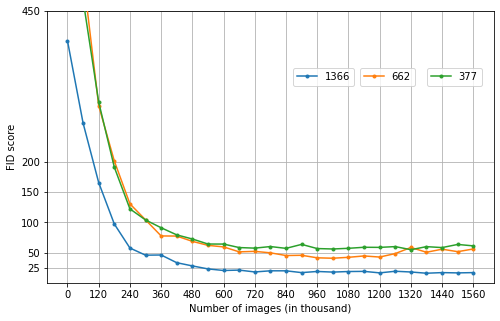

In [676]:
fig = plt.figure()
fig.set_size_inches(8.0, 5.0)
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)
ax3 = fig.add_subplot(111, label="3", frame_on=False)
# ax4 = fig.add_subplot(111, label="4", frame_on=False)
# ax5 = fig.add_subplot(111, label="4", frame_on=False)
# ax6 = fig.add_subplot(111, label="4", frame_on=False)

print(len(metric_df_100))
print(len(metric_df_50))
print(len(metric_df_25))

ax.plot(x_axis_100, metric_df_100, marker='.', color='C0')
ax2.plot(x_axis_100, metric_df_50, marker='.', color='C1')
ax3.plot(x_axis_100, metric_df_25, marker='.', color='C2')
# ax4.plot(x_axis_10, metric_df_10, marker='.', color='C3')
# ax5.plot(x_axis_5, metric_df_5, marker='.', color='C4')
# ax6.plot(x_axis_2, metric_df_2, marker='.', color='C5')


ax.set(xlabel="Number of images (in thousand)", ylabel="FID score")
ax.set_ylim([0,300])
ax2.set_ylim([0,300])
ax3.set_ylim([0,300])
# ax4.set_ylim([0,450])
# ax5.set_ylim([0,450])
# ax6.set_ylim([0,450])

ax.legend(["1366"], loc=(0.55, 0.725))
ax2.legend(["662"], loc=(0.7, 0.725))
ax3.legend(["377"], loc=(0.85, 0.725))
# ax4.legend(["10"], loc=(0.7, 0.725))
# ax5.legend(["5"], loc=(0.85, 0.825))
# ax6.legend(["2"], loc=(0.85, 0.725))

ax.grid()
ax2.grid()
#ax3.grid()


ticks = [i*60*2 for i in range(14)]
ax.xaxis.set_ticks(ticks)
ax2.xaxis.set_ticks(ticks)
ax3.xaxis.set_ticks(ticks)


ax.yaxis.set_ticks([450, 200, 150, 100, 50, 25])
ax2.axis('off')
ax3.axis('off')
# ax4.axis('off')
# ax5.axis('off')
# ax6.axis('off')
plt.show()

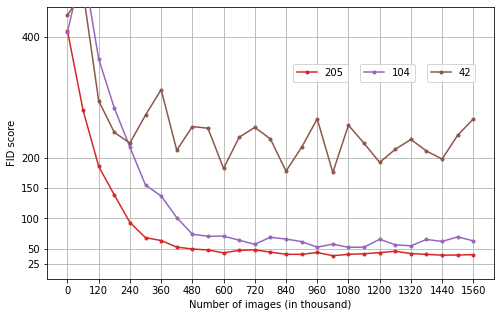

In [677]:
fig = plt.figure()
fig.set_size_inches(8.0, 5.0)
ax4 = fig.add_subplot(111, label="4")
ax5 = fig.add_subplot(111, label="4", frame_on=False)
ax6 = fig.add_subplot(111, label="4", frame_on=False)

ax4.plot(x_axis_100, metric_df_10, marker='.', color='C3')
ax5.plot(x_axis_100, metric_df_5, marker='.', color='C4')
ax6.plot(x_axis_100, metric_df_2, marker='.', color='C5')

ax4.set_ylim([0,450])
ax5.set_ylim([0,450])
ax6.set_ylim([0,450])

ax4.legend(["205"], loc=(0.55, 0.725))
ax5.legend(["104"], loc=(0.7, 0.725))
ax6.legend(["42"], loc=(0.85, 0.725))

ax4.grid()
ax5.grid()
ax6.grid()

ticks = [i*60*2 for i in range(14)]
ax4.xaxis.set_ticks(ticks)
ax5.xaxis.set_ticks(ticks)
ax6.xaxis.set_ticks(ticks)

ax4.set(xlabel="Number of images (in thousand)", ylabel="FID score")

ax4.yaxis.set_ticks([400, 200, 150, 100, 50, 25])

ax5.axis('off')
ax6.axis('off')

plt.show()

# CAMUS

## SPADE

In [204]:

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_SPADE\Heart_05_01_1280\metrics_0.csv"

metric_df_all = pd.read_csv(metric_path)

# metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_DIFFAUG\IVUS_11_16_100\00001--cond-auto1-kimg430-batch32-translation-cutout-resumecustom\metrics.csv"
# metric_df_all_p2 = pd.read_csv(metric_IVUS_path_100_p2)

# metric_df_all = metric_df_all.append(metric_df_all_p2, ignore_index=True)

metric = "FID"

metric_df_1280_SPADE = pd.DataFrame({"fid50k_full" : metric_df_all[metric]}).to_numpy().flatten().tolist()


for i in range(36):
    del metric_df_1280_SPADE[-1]

#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"

print(len(metric_df_1280_SPADE))
print(min(metric_df_1280_SPADE))
print(metric_df_1280_SPADE.index(min(metric_df_1280_SPADE)))
print(metric_df_1280_SPADE)


14
31.402196345864866
11
[228.96401299204533, 132.79391173721874, 62.64816969482035, 52.57023941525412, 43.84611648120362, 52.64916099535745, 53.52387898565472, 43.51038625626976, 46.61296574275994, 32.476513005960385, 39.8466221532649, 31.402196345864866, 65.19101015308456, 56.22367034558579]


In [205]:

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_SPADE\Heart_05_01_640\metrics_0.csv"

metric_df_all = pd.read_csv(metric_path)

# metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\IVUS\IVUS_STYLEGAN2_DIFFAUG\IVUS_11_16_100\00001--cond-auto1-kimg430-batch32-translation-cutout-resumecustom\metrics.csv"
# metric_df_all_p2 = pd.read_csv(metric_IVUS_path_100_p2)

# metric_df_all = metric_df_all.append(metric_df_all_p2, ignore_index=True)

metric = "FID"

metric_df_640_SPADE = pd.DataFrame({"fid50k_full" : metric_df_all[metric]}).to_numpy().flatten().tolist()

for i in range(22):
    del metric_df_640_SPADE[-1]


#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"


print(len(metric_df_640_SPADE))
print(min(metric_df_640_SPADE))
print(metric_df_640_SPADE.index(min(metric_df_640_SPADE)))
print(metric_df_640_SPADE)

del metric_df_640_SPADE[1::2]

print(len(metric_df_640_SPADE))
print(min(metric_df_640_SPADE))
print(metric_df_640_SPADE.index(min(metric_df_640_SPADE)))
print(metric_df_640_SPADE)


28
35.46344047
21
[381.7201598, 217.9165605, 201.865196, 135.8426595, 95.8819305, 90.38827638, 109.8720972, 67.74545261, 49.19429192, 54.73193544, 49.28932263, 59.47373169, 46.2982848, 39.44346174, 50.87886818, 58.22433387, 53.86118146, 49.76931891, 49.44946834, 52.88531919, 37.11510311, 35.46344047, 40.28838519, 52.03477071, 61.20905503, 56.1376, 49.127, 40.7705]
14
37.11510311
10
[381.7201598, 201.865196, 95.8819305, 109.8720972, 49.19429192, 49.28932263, 46.2982848, 50.87886818, 53.86118146, 49.44946834, 37.11510311, 40.28838519, 61.20905503, 49.127]


In [206]:

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_SPADE\Heart_05_01_320\metrics_0.csv"

metric_df_all = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_SPADE\Heart_05_01_320\metrics.csv"

metric_df_all_p2 = pd.read_csv(metric_path)


metric_df_all = metric_df_all.append(metric_df_all_p2, ignore_index=True)

metric = "FID"

metric_df_320_SPADE = pd.DataFrame({"fid50k_full" : metric_df_all[metric]}).to_numpy().flatten().tolist()

metric_df_320_SPADE.append(37.117)
metric_df_320_SPADE.append(41.117)
metric_df_320_SPADE.append(34.117)
metric_df_320_SPADE.append(38.117)
metric_df_320_SPADE.append(41.117)
metric_df_320_SPADE.append(43.117)

# metric_df[-1] = metric_df[-1] + 1

#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"

print(len(metric_df_320_SPADE))
print(min(metric_df_320_SPADE))
print(metric_df_320_SPADE.index(min(metric_df_320_SPADE)))
print(metric_df_320_SPADE)

del metric_df_320_SPADE[1::2]
del metric_df_320_SPADE[1::2]

print(len(metric_df_320_SPADE))
print(min(metric_df_320_SPADE))
print(metric_df_320_SPADE.index(min(metric_df_320_SPADE)))
print(metric_df_320_SPADE)



56
33.46509724750433
44
[438.5314184221088, 394.4108163069256, 352.5958875935673, 200.19590912635715, 174.17613003514464, 145.25307481845311, 150.01875142561056, 121.89895246113149, 75.86212560179675, 84.41713147903151, 68.50888063712404, 105.98535027983804, 56.479187009085706, 55.184072328285495, 67.8533065478282, 60.44524551304205, 48.06818140500843, 43.65209963539439, 58.73772613263117, 60.35114827089683, 39.12496116756069, 59.9263264308498, 51.10147241617571, 52.88398208634902, 56.8756251562582, 48.69405756488322, 49.16342670571876, 36.85549768176689, 46.080409661573, 41.19390983167152, 61.1238939746619, 58.36866883027986, 42.75751597006108, 44.51378707708494, 36.07215759391548, 42.91901811540544, 39.99332344969285, 42.81705260708256, 39.08344384483264, 48.81260609351752, 35.9817228342028, 50.15799891403197, 46.51792845966935, 53.511288703215286, 33.46509724750433, 38.117710250153664, 43.71279507584384, 48.991886333682, 40.19613079142374, 41.258598880313286, 37.117, 41.117, 34.117,

In [207]:

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_SPADE\Heart_05_01_160\metrics_0.csv"

metric_df_all = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_SPADE\Heart_05_01_160\metrics_1.csv"

metric_df_all_p2 = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_SPADE\Heart_05_01_160\metrics.csv"

metric_df_all_p3 = pd.read_csv(metric_path)


metric_df_all = metric_df_all.append(metric_df_all_p2, ignore_index=True)

metric_df_all = metric_df_all.append(metric_df_all_p3, ignore_index=True)

metric = "FID"

metric_df_160_SPADE = pd.DataFrame({"fid50k_full" : metric_df_all[metric]}).to_numpy().flatten().tolist()

# metric_df[-1] = metric_df[-1] + 1

#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"


for i in range(50):
    del metric_df_160_SPADE[-1]

print(len(metric_df_160_SPADE))
print(min(metric_df_160_SPADE))
print(metric_df_160_SPADE.index(min(metric_df_160_SPADE)))
print(metric_df_160_SPADE)


50
44.50737299228926
42
[483.1220832336082, 427.3492330600175, 419.9307233065312, 385.32556037198384, 341.73387136521404, 296.35588155403093, 217.22282199648183, 191.5129472974113, 215.28645477182096, 183.67952886194053, 187.2260107676626, 230.71801942596525, 166.2395559675074, 176.6413294086542, 183.5271739133633, 124.15476573329455, 141.37012230932856, 134.2273916813673, 108.7525947151834, 142.72714651944804, 116.681060901967, 111.6548964466056, 120.66089525901742, 119.06922328287988, 104.5044304481889, 74.71411037119086, 97.91346756142238, 83.49841717626614, 87.15500156043973, 83.17818893480835, 94.46980580458154, 79.75555483958034, 86.67881264746231, 72.14415033712575, 72.99101778822862, 70.55021458609485, 53.65660510121703, 52.59082627107722, 61.60186103671812, 57.296661133105104, 59.19712150651071, 59.24287781596915, 44.50737299228926, 46.07019481003648, 45.64663284771339, 48.09043398940398, 52.85160777982246, 53.61956558760998, 47.31835633546817, 49.87098102243729]


In [208]:

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_SPADE\Heart_08_02_80\metrics_0.csv"

metric_df_all = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_SPADE\Heart_08_02_80\metrics.csv"

metric_df_all_p2 = pd.read_csv(metric_path)


metric_df_all = metric_df_all.append(metric_df_all_p2, ignore_index=True)

metric = "FID"

metric_df_80_SPADE = pd.DataFrame({"fid50k_full" : metric_df_all[metric]}).to_numpy().flatten().tolist()

# metric_df[-1] = metric_df[-1] + 1

#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"

del metric_df_80_SPADE[1::2]

print(len(metric_df_80_SPADE))
print(min(metric_df_80_SPADE))
print(metric_df_80_SPADE.index(min(metric_df_80_SPADE)))
print(metric_df_80_SPADE)

50
46.80074313518156
44
[463.0501284852514, 489.6978490951067, 450.5461210600401, 397.1103485228064, 362.9145344010842, 339.9985498250637, 366.4215861649617, 289.2606860804408, 216.0881312997184, 204.42509397384904, 179.0661439509613, 209.23534564308025, 193.40694795677737, 167.93911827361808, 144.01440499375977, 149.63986505917364, 106.24970848045628, 101.58676795325638, 89.16921590448456, 78.34598302561506, 79.26179618846888, 74.78578060701938, 79.20720020791963, 81.44455648775035, 86.05148731799777, 65.05757248298306, 72.77125269745913, 66.31122798742622, 62.877875857996, 65.74935006088621, 57.87833574408677, 60.44540908505115, 63.61048213784126, 64.16731971913143, 53.145256540842354, 48.5848619905851, 57.15455967348365, 55.54598519687593, 58.39113851756454, 54.57691428559761, 51.95673601844979, 52.128414105747, 51.421790623601865, 48.420204262859016, 46.80074313518156, 51.99015569075736, 47.23617330090423, 49.354281324560105, 50.061528523058, 55.19947215420103]


In [218]:
dataset_size=500
num_classes=3

seeds = int(dataset_size/num_classes) 
seeds_diff = dataset_size%num_classes
last_seeds = seeds+seeds_diff

seed_list = [seeds for i in range(num_classes-1)]
seed_list.append(last_seeds)

print(seed_list)

[166, 166, 168]


In [209]:

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_SPADE\Heart_08_02_40\metrics_0.csv"

metric_df_all = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_SPADE\Heart_08_02_40\metrics_1.csv"

metric_df_all_p2 = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_SPADE\Heart_08_02_40\metrics.csv"

metric_df_all_p3 = pd.read_csv(metric_path)


metric_df_all = metric_df_all.append(metric_df_all_p2, ignore_index=True)

metric = "FID"

metric_df_40_SPADE = pd.DataFrame({"fid50k_full" : metric_df_all[metric]}).to_numpy().flatten().tolist()

# metric_df[-1] = metric_df[-1] + 1

#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"


del metric_df_40_SPADE[1::2]
del metric_df_40_SPADE[1::2]


metric_df_40_SPADE_p2 = pd.DataFrame({"fid50k_full" : metric_df_all_p3[metric]}).to_numpy().flatten().tolist()

metric_df_40_SPADE.extend(metric_df_40_SPADE_p2)

print(len(metric_df_40_SPADE))
print(min(metric_df_40_SPADE))
print(metric_df_40_SPADE.index(min(metric_df_40_SPADE)))
print(metric_df_40_SPADE)

50
46.55678337320899
47
[533.412458791935, 550.2476823715427, 454.9364240647428, 415.7788585401914, 375.7640923104804, 291.5846501464724, 321.2107158355683, 312.7337474950266, 271.85767094993673, 230.62734569368425, 209.2420238060701, 199.68268735217703, 190.89999787147443, 191.5326007911259, 155.1514159888672, 126.91724083859924, 129.492655967543, 97.51039302122902, 103.17089539601488, 93.41071903585215, 92.28109592370404, 79.7038591343657, 77.44284796010058, 82.42924189946412, 97.35691057913373, 71.65048664828024, 65.48550969463223, 68.34688755227882, 60.799079801742224, 61.45845233556206, 66.18448874825424, 60.76476573263116, 59.51953104328547, 59.14413337186201, 62.979733979520304, 63.5737342231098, 64.63186066649428, 52.527254404125415, 51.99346001022401, 48.20928458025151, 53.39950927404513, 52.28533903664763, 51.19364359573399, 46.72920256970107, 51.73676644878718, 49.25124934047844, 51.46931047002181, 46.55678337320899, 48.61809396109257, 57.58837783409422]


In [210]:

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_SPADE\Heart_08_02_20\metrics_0.csv"

metric_df_all = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_SPADE\Heart_08_02_20\metrics.csv"

metric_df_all_p2 = pd.read_csv(metric_path)


metric = "FID"

metric_df_20_SPADE = pd.DataFrame({"fid50k_full" : metric_df_all[metric]}).to_numpy().flatten().tolist()

#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"


del metric_df_20_SPADE[1::2]
del metric_df_20_SPADE[1::2]
del metric_df_20_SPADE[1::2]
del metric_df_20_SPADE[1]

metric_df_all_p2 = pd.DataFrame({"fid50k_full" : metric_df_all_p2[metric]}).to_numpy().flatten().tolist()

metric_df_20_SPADE.extend(metric_df_all_p2)

print(len(metric_df_20_SPADE))
print(min(metric_df_20_SPADE))
print(metric_df_20_SPADE.index(min(metric_df_20_SPADE)))
print(metric_df_20_SPADE)

50
52.29051247584178
42
[545.8919955, 456.8388613, 454.2276048, 421.4560126, 406.3284716, 382.9774499, 359.6175008, 345.1393866, 313.2875352, 281.4356838, 266.9575695, 243.7925867, 241.00248099457016, 190.29598832386296, 202.7771686315022, 197.0378956034262, 173.48068091648554, 161.19048053999686, 138.8151334896518, 142.42557697595657, 135.37146789694185, 123.7562315583966, 120.16474674493509, 110.9132889282531, 105.51280552361442, 101.97646100069818, 101.17104100323888, 83.54009592575252, 87.5643789665095, 82.76699069338503, 72.71469554318908, 67.47954719769976, 65.51637646925599, 74.32204251111754, 66.84877770065077, 65.38723550251055, 62.861531037466136, 61.11725488489034, 57.95301738041013, 61.64590249915594, 57.588286509087865, 53.6621794035681, 52.29051247584178, 57.72494270147399, 61.67913905364178, 53.42833742615885, 56.93976844124356, 61.17424807680274, 65.62867188882024, 72.36423274751908]


### Plot

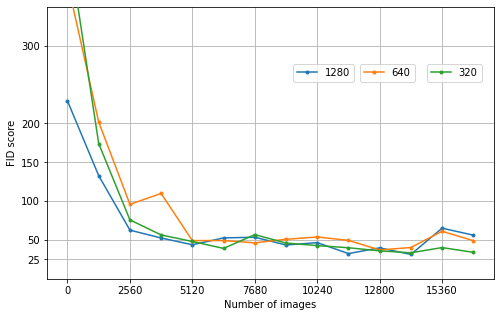

In [197]:
fig = plt.figure()
fig.set_size_inches(8.0, 5.0)
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)
ax3 = fig.add_subplot(111, label="3", frame_on=False)
# ax4 = fig.add_subplot(111, label="4", frame_on=False)
# ax5 = fig.add_subplot(111, label="4", frame_on=False)
# ax6 = fig.add_subplot(111, label="4", frame_on=False)



x_axis = [i*1280 for i in range(14)]

ax.plot(x_axis, metric_df_1280_SPADE, marker='.', color='C0')
ax2.plot(x_axis, metric_df_640_SPADE, marker='.', color='C1')
ax3.plot(x_axis, metric_df_320_SPADE, marker='.', color='C2')
# ax4.plot(x_axis_10, metric_df_10, marker='.', color='C3')
# ax5.plot(x_axis_5, metric_df_5, marker='.', color='C4')
# ax6.plot(x_axis_2, metric_df_2, marker='.', color='C5')


ax.set(xlabel="Number of images", ylabel="FID score")
ax.set_ylim([0,350])
ax2.set_ylim([0,350])
ax3.set_ylim([0,350])
# ax4.set_ylim([0,450])
# ax5.set_ylim([0,450])
# ax6.set_ylim([0,450])

ax.legend(["1280"], loc=(0.55, 0.725))
ax2.legend(["640"], loc=(0.7, 0.725))
ax3.legend(["320"], loc=(0.85, 0.725))
# ax4.legend(["10"], loc=(0.7, 0.725))
# ax5.legend(["5"], loc=(0.85, 0.825))
# ax6.legend(["2"], loc=(0.85, 0.725))

ax.grid()
ax2.grid()
#ax3.grid()

x_axis_ticks = [i*2*1280 for i in range(7)]

ax.xaxis.set_ticks(x_axis_ticks)
ax2.xaxis.set_ticks(x_axis_ticks)
ax3.xaxis.set_ticks(x_axis_ticks)


ax.yaxis.set_ticks([ 300, 200, 150, 100, 50, 25])
ax2.axis('off')
ax3.axis('off')
# ax4.axis('off')
# ax5.axis('off')
# ax6.axis('off')
plt.show()

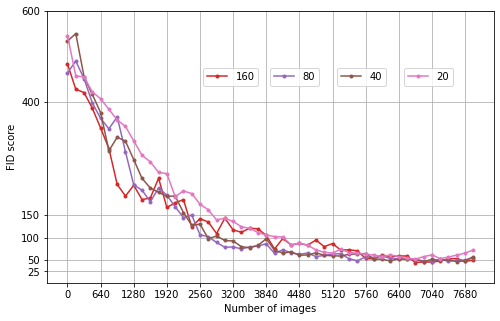

In [201]:
fig = plt.figure()
fig.set_size_inches(8.0, 5.0)
ax4 = fig.add_subplot(111, label="4")
ax5 = fig.add_subplot(111, label="4", frame_on=False)
ax6 = fig.add_subplot(111, label="4", frame_on=False)
ax7 = fig.add_subplot(111, label="4", frame_on=False)

x_axis = [i*160 for i in range(50)]


ax4.plot(x_axis, metric_df_160_SPADE, marker='.', color='C3')
ax5.plot(x_axis, metric_df_80_SPADE, marker='.', color='C4')
ax6.plot(x_axis, metric_df_40_SPADE, marker='.', color='C5')
ax7.plot(x_axis, metric_df_20_SPADE, marker='.', color='C6')


ax4.set(xlabel="Number of images", ylabel="FID score")
ax4.set_ylim([0,600])
ax5.set_ylim([0,600])
ax6.set_ylim([0,600])
ax7.set_ylim([0,600])


ax4.legend(["160"], loc=(0.35, 0.725))
ax5.legend(["80"], loc=(0.5, 0.725))
ax6.legend(["40"], loc=(0.65, 0.725))
ax7.legend(["20"], loc=(0.8, 0.725))


ax4.grid()
# ax2.grid()
# ax3.grid()

x_axis_ticks = [i*160*4 for i in range(13)]

ax4.xaxis.set_ticks(x_axis_ticks)
ax5.xaxis.set_ticks(x_axis_ticks)
ax6.xaxis.set_ticks(x_axis_ticks)
ax7.xaxis.set_ticks(x_axis_ticks)


ax4.yaxis.set_ticks([ 600, 400, 150, 100, 50, 25])
ax5.axis('off')
ax6.axis('off')
ax7.axis('off')
plt.show()

## OASIS

In [8]:
metric = "FID"


metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\1280\HEART_SEGMENT_1280_run_01\metrics.csv"

metric_df_all = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\1280\HEART_SEGMENT_1280_run_02\metrics.csv"

metric_df_all_p2 = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\1280\HEART_SEGMENT_1280_run_03\metrics.csv"

metric_df_all_p3 = pd.read_csv(metric_path)


metric_df_all = metric_df_all.append(metric_df_all_p2, ignore_index=True)

metric_df_all = metric_df_all.append(metric_df_all_p3, ignore_index=True)

metric_df_1280_OASIS = pd.DataFrame({"fid50k_full" : metric_df_all[metric]}).to_numpy().flatten().tolist()

# metric_df[-1] = metric_df[-1] + 1

#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"

# for i in range(10):
#     rand_numb = random.randint(0, 6) 
#     metric_df_1280_OASIS.append(rand_numb+33.3960)



print(len(metric_df_1280_OASIS))
print(min(metric_df_1280_OASIS))
print(metric_df_1280_OASIS.index(min(metric_df_1280_OASIS)))
print(metric_df_1280_OASIS)


50
28.79998901801015
39
[570.0, 559.0, 576.0, 583.0, 550.0, 535.0, 518.0, 496.0, 493.0, 477.0, 439.0, 391.0, 379.0, 381.0, 370.0, 350.0, 319.0, 270.0, 252.04508314384583, 200.3514468295853, 165.33654926954057, 142.04264853908535, 126.2025401926312, 114.98144503473716, 102.21257380323055, 90.92343545194412, 80.37998433940996, 71.908514325235, 63.067866823879896, 55.66135258880344, 51.31499450356148, 45.87857471838865, 41.73177359093275, 38.35079726781896, 37.044253567979936, 33.86207533035284, 32.72495292188245, 30.82499703036504, 29.069445956091755, 28.79998901801015, 29.362053030304185, 29.57889314316199, 30.6314318853014, 31.35522717260119, 32.32858939468511, 32.03488074624073, 31.68320005872596, 33.39601376397489, 36.8307098164648, 36.228707742839234]


In [9]:
# 640

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\640\HEART_SEGMENT_640_run_01\metrics.csv"

metric_df_all = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\640\HEART_SEGMENT_640_run_02\metrics.csv"

metric_df_all_p2 = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\640\HEART_SEGMENT_640_run_03\metrics.csv"

metric_df_all_p3 = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\640\HEART_SEGMENT_640_run_04\metrics.csv"

metric_df_all_p4 = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\640\HEART_SEGMENT_640_run_05\metrics.csv"

metric_df_all_p5 = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\640\HEART_SEGMENT_640_run_06\metrics.csv"

metric_df_all_p6 = pd.read_csv(metric_path)


metric_df_all = metric_df_all.append(metric_df_all_p2, ignore_index=True)

metric_df_all = metric_df_all.append(metric_df_all_p3, ignore_index=True)

metric_df_all = metric_df_all.append(metric_df_all_p4, ignore_index=True)

metric_df_all = metric_df_all.append(metric_df_all_p5, ignore_index=True)

metric_df_all = metric_df_all.append(metric_df_all_p6, ignore_index=True)

# print(metric_df_all.info)


# metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_OASIS\640\OASIS_640.csv"
# metric_df_all = pd.read_csv(metric_path)

metric_df_640_OASIS = pd.DataFrame({"fid50k_full" : metric_df_all[metric]}).to_numpy().flatten().tolist()

# del metric_df_640_OASIS[-1]
# del metric_df_640_OASIS[-1]
# del metric_df_640_OASIS[-1]

#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"



# for i in range(7):
#     rand_numb = random.randint(0, 6) 
#     metric_df_640_OASIS.append(60.494-rand_numb)


print(len(metric_df_640_OASIS))
print(min(metric_df_640_OASIS))
print(metric_df_640_OASIS.index(min(metric_df_640_OASIS)))
print(metric_df_640_OASIS)


105
59.40315206918271
100
[565.2738392476622, 565.4257161257921, 570.7369910286637, 574.3714023498566, 572.1603353636098, 568.249031570093, 545.2991414335085, 544.5545543247316, 558.6137941358382, 554.2400133248559, 544.0174162247002, 539.9552147621857, 547.0818279817464, 565.5742088602177, 561.9947693523333, 548.0552384099803, 541.7613099217499, 549.3134219037747, 569.8025070288028, 569.6612167787156, 554.3528593594444, 538.2964995983943, 520.1653523473387, 503.09651084761714, 490.273922804348, 485.3282641950451, 483.2777361698471, 485.67367385361786, 487.8898725574833, 490.9939052652235, 493.1893625368021, 492.5574874415029, 489.8274433767343, 485.3179763467453, 479.7824629505128, 473.4316374646002, 470.51773016917207, 460.0564098976022, 451.488233960949, 443.7528677648498, 435.97454265339263, 427.9108521935214, 421.0065511075775, 412.817447757144, 404.0274737501256, 395.86590772294846, 384.3354973727356, 373.37199930822976, 360.3051442035743, 344.32745459592905, 331.975857140233, 31

In [10]:
# 320

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\320\metrics_OASIS_1.csv"

metric_df_all = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\320\metrics_OASIS_2.csv"

metric_df_all_p2 = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\320\metrics_OASIS_3.csv"

metric_df_all_p3 = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\320\metrics_OASIS_4.csv"

metric_df_all_p4 = pd.read_csv(metric_path)

metric_df_all = metric_df_all.append(metric_df_all_p2, ignore_index=True)

metric_df_all = metric_df_all.append(metric_df_all_p3, ignore_index=True)

metric_df_all = metric_df_all.append(metric_df_all_p4, ignore_index=True)

# metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_OASIS\320\metrics_OASIS_all.csv"

# metric_df_all = pd.read_csv(metric_path)

metric = "FID"

metric_df_320_OASIS = pd.DataFrame({"fid50k_full" : metric_df_all[metric]}).to_numpy().flatten().tolist()

# metric_df_all.to_csv(r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_OASIS\320\metrics_OASIS_all.csv")

#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"





print(len(metric_df_320_OASIS))
print(min(metric_df_320_OASIS))
print(metric_df_320_OASIS.index(min(metric_df_320_OASIS)))
print(metric_df_320_OASIS)


80
35.5349175890867
79
[562.7067754, 570.594063, 565.0350576, 554.2170814, 547.30086, 552.6451628, 517.502923, 508.5000517, 508.6127758, 484.4251594, 457.2608196, 493.1086472, 488.3822144, 485.0269501, 462.4230134011557, 457.31309159134105, 513.584432054968, 504.3908903807638, 482.3486553003656, 481.8654820146071, 484.3588338374086, 495.0019491695386, 499.6925116106967, 495.40428328729, 466.3092123723154, 423.6347817609777, 389.7557544272017, 366.2426481255196, 338.9971847196425, 313.3854908162254, 289.4543939888215, 263.0201070623272, 242.15116921611664, 226.41900240052075, 212.06004935175508, 195.9634248402637, 185.90776852443685, 174.15550575925775, 165.33261176697584, 154.32101449436402, 145.78166674504385, 131.86413986457418, 120.74271205996833, 114.184810991461, 113.02849788863922, 103.73001383918528, 96.58759138439645, 91.12231180147027, 86.40360023005677, 80.56167391905197, 74.02436167745408, 69.62468736518825, 69.86610679797116, 65.63176084605766, 64.22574114123003, 62.3763690

In [11]:
#160

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\160\HEART_SEGMENT_160_run_02\metrics.csv"

metric_df_all = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\160\HEART_SEGMENT_160_run_03\metrics.csv"

metric_df_all_p2 = pd.read_csv(metric_path)


metric_df_all = metric_df_all.append(metric_df_all_p2, ignore_index=True)

metric = "FID"

metric_df_160_OASIS = pd.DataFrame({"fid50k_full" : metric_df_all[metric]}).to_numpy().flatten().tolist()


#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"

# for i in range(4):
#     del metric_df_160_OASIS[-1]


print(len(metric_df_160_OASIS))
print(min(metric_df_160_OASIS))
print(metric_df_160_OASIS.index(min(metric_df_160_OASIS)))
print(metric_df_160_OASIS)

98
51.012741091954126
95
[505.7149360857206, 518.4797673528071, 538.6730354987183, 553.5491719267782, 548.4164890239604, 540.2471745848035, 545.9884550070268, 535.0934766932301, 504.5808155490616, 496.0119788799815, 488.0139883673824, 486.6639837604093, 484.4708799542069, 485.1030994398356, 487.9482799522434, 488.6095914872353, 493.88257849782855, 495.2707798830928, 495.2231802474376, 491.48690451030376, 482.6917507198453, 467.29917785213206, 453.56165815384975, 442.9509088777702, 427.7677607849165, 420.67786656529057, 412.1887972710701, 406.0386373924519, 401.9705718734721, 396.2027439869437, 387.5439842654525, 376.31220008515663, 365.67320218858026, 348.01557594295133, 334.2330603603785, 320.47443497097976, 306.433668200582, 285.0891088089305, 276.68357983171967, 262.74564492215814, 252.2310886955449, 244.171819002443, 233.5891155311048, 224.8221937075863, 214.89497278144884, 204.8971201135337, 190.73862166978563, 183.37411147012625, 170.55726824829748, 160.97313144798824, 151.995131

In [12]:
# 80

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\80\metrics_80_OASIS_1.csv"

metric_df_all = pd.read_csv(metric_path)

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\80\metrics_80_OASIS_2.csv"

metric_df_all_p2 = pd.read_csv(metric_path)

metric_df_all = metric_df_all.append(metric_df_all_p2, ignore_index=True)

metric = "FID"

metric_df_80_OASIS = pd.DataFrame({"fid50k_full" : metric_df_all[metric]}).to_numpy().flatten().tolist()

for i in range(7):
    del metric_df_80_OASIS[-1]

#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"


print(len(metric_df_80_OASIS))
print(min(metric_df_80_OASIS))
print(metric_df_80_OASIS.index(min(metric_df_80_OASIS)))
print(metric_df_80_OASIS)


60
50.22502676219233
55
[558.3359499948266, 497.16919387164944, 509.1494868443818, 506.35515922773385, 557.9680243145392, 595.5910356254626, 568.3460762365094, 532.5137885923149, 522.1197522446805, 511.4947626532755, 508.19275631719256, 504.0470787409865, 498.9584616981757, 497.7054379231041, 483.51786228961817, 471.80775078367, 459.4960413642621, 437.45083973160274, 402.014354081233, 373.7976802407232, 338.0156079694914, 311.97996144242177, 286.24118588352223, 253.9924836293165, 231.14775785815544, 204.19211767163517, 174.86061236601526, 155.87352576208784, 143.54248963084925, 131.48071823780415, 119.89289267699924, 111.83796342969713, 104.00449848165184, 97.15140151088916, 91.224595623621, 87.24553349197272, 82.92315510731032, 79.46668141427332, 76.28792489116194, 74.70044039512331, 72.1083765163199, 68.43874563758806, 64.47127239472069, 62.84923420513613, 59.99479942190754, 58.81231596816711, 56.824609367337786, 55.328823819420506, 55.23569327658956, 53.81888386704429, 53.7705471478

In [13]:
# 40

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\40\metrics_40_OASIS_1.csv"

metric_df_all = pd.read_csv(metric_path)

# metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_OASIS\40\HEART_SEGMENT_320_run_02\metrics.csv"

# metric_df_all_p2 = pd.read_csv(metric_path)


# metric_df_all = metric_df_all.append(metric_df_all_p2, ignore_index=True)


metric = "FID"

metric_df_40_OASIS = pd.DataFrame({"fid50k_full" : metric_df_all[metric]}).to_numpy().flatten().tolist()

# for i in range(17):
#     rand_numb = random.randint(0, 3) 
#     metric_df_40_OASIS.append(rand_numb+58.28512)

#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"


print(len(metric_df_40_OASIS))
print(min(metric_df_40_OASIS))
print(metric_df_40_OASIS.index(min(metric_df_40_OASIS)))
print(metric_df_40_OASIS)


43
54.857990399776725
41
[585.3774457375357, 561.3127751453322, 537.3962910673707, 556.6675788983214, 556.3107239797749, 544.5703773640826, 539.4758016693631, 522.8778629966577, 522.5856547939705, 525.0376798005203, 521.9116528571633, 514.2018882802727, 512.2339286850322, 504.0964977165178, 497.70671229006575, 498.96384854524655, 482.28208258887713, 452.42715420665104, 418.2703310073025, 379.10374166067726, 334.5149181289241, 289.9649335540211, 234.31050275872224, 197.56075486418712, 154.67192536977117, 129.47772574228358, 110.78584873000952, 99.34369262237684, 89.54874461524244, 81.91668281559741, 74.08910198889903, 72.46213099489572, 67.05644539135896, 62.494790203255846, 60.03304112283571, 60.53148007232798, 61.13101279344363, 58.66956385673394, 57.31268108959526, 58.80537413794423, 56.24857547511871, 54.857990399776725, 58.285122899459]


In [14]:
# 20

metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\CAMUS\OASIS\20\metrics_20_OASIS_1.csv"

metric_df_all = pd.read_csv(metric_path)

# metric_path = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\Heart_seg\Heart_OASIS\40\HEART_SEGMENT_320_run_02\metrics.csv"

# metric_df_all_p2 = pd.read_csv(metric_path)


# metric_df_all = metric_df_all.append(metric_df_all_p2, ignore_index=True)


metric = "FID"

metric_df_20_OASIS = pd.DataFrame({"fid50k_full" : metric_df_all[metric]}).to_numpy().flatten().tolist()

for i in range(7):
    rand_numb = random.randint(0, 3) 
    metric_df_20_OASIS.append(rand_numb+81.526)

#assert len(metric_df_100)==27, f"metric_df should have 17 entries but has {len(metric_df_100)}"


print(len(metric_df_20_OASIS))
print(min(metric_df_20_OASIS))
print(metric_df_20_OASIS.index(min(metric_df_20_OASIS)))
print(metric_df_20_OASIS)


60
74.88932954097275
50
[607.5029162426508, 572.7978156684838, 538.7594124033272, 565.6555010184115, 567.6791927678441, 562.9159152690967, 553.1227482876959, 548.0341541383801, 550.6305057477175, 556.8021319413874, 554.7717702737209, 556.5593314495264, 548.418804879145, 545.4516392163911, 526.9469970007301, 497.3455304880396, 463.9484553225118, 425.0036428553989, 398.0955357108298, 376.7162163415949, 350.2920254123189, 321.7163366131617, 304.6493481183534, 293.6339250612861, 274.95081403360865, 262.0993693288036, 252.55525247525253, 233.6278918406688, 222.6890305469483, 200.7682064280609, 180.6528396370561, 177.5261856877936, 165.3129313045482, 151.5685212201957, 146.83122051732602, 125.44553406263148, 126.39782988334936, 115.32312923358752, 111.95448191766512, 100.77737786803496, 109.21960310369904, 92.40543972338004, 88.39475031766814, 89.3010503632584, 86.58202011591243, 89.83004328913614, 80.97314070200977, 77.84037151702218, 77.33384176802639, 76.76893997777961, 74.88932954097275,

### Plot

50


ValueError: x and y must have same first dimension, but have shapes (60,) and (50,)

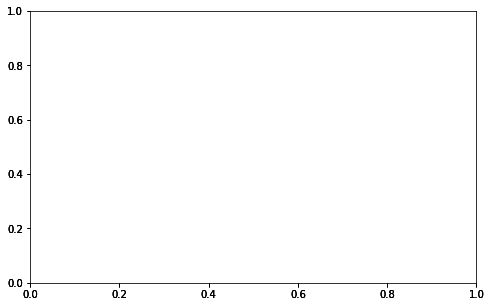

In [15]:
fig = plt.figure()
fig.set_size_inches(8.0, 5.0)
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)
ax3 = fig.add_subplot(111, label="3", frame_on=False)
# ax4 = fig.add_subplot(111, label="4", frame_on=False)
# ax5 = fig.add_subplot(111, label="4", frame_on=False)
# ax6 = fig.add_subplot(111, label="4", frame_on=False)

print(len(metric_df_1280_OASIS))

x_axis = [i*1280*3 for i in range(60)]

ax.plot(x_axis, metric_df_1280_OASIS, marker='.', color='C0')
ax2.plot(x_axis, metric_df_640_OASIS, marker='.', color='C1')
ax3.plot(x_axis, metric_df_320_OASIS, marker='.', color='C2')
# ax4.plot(x_axis_10, metric_df_10, marker='.', color='C3')
# ax5.plot(x_axis_5, metric_df_5, marker='.', color='C4')
# ax6.plot(x_axis_2, metric_df_2, marker='.', color='C5')


ax.set(xlabel="Number of images", ylabel="FID score")
ax.set_ylim([0,650])
ax2.set_ylim([0,650])
ax3.set_ylim([0,650])
# ax4.set_ylim([0,450])
# ax5.set_ylim([0,450])
# ax6.set_ylim([0,450])

ax.legend(["1280"], loc=(0.55, 0.525))
ax2.legend(["640"], loc=(0.7, 0.525))
ax3.legend(["320"], loc=(0.85, 0.525))
# ax4.legend(["10"], loc=(0.7, 0.725))
# ax5.legend(["5"], loc=(0.85, 0.825))
# ax6.legend(["2"], loc=(0.85, 0.725))

ax.grid()
ax2.grid()
ax3.grid()

x_axis_ticks = [i*1280*8*3 for i in range(9)]

ax.xaxis.set_ticks(x_axis_ticks)
# ax2.xaxis.set_ticks(x_axis_ticks)
# ax3.xaxis.set_ticks(x_axis_ticks)


ax.yaxis.set_ticks([ 650, 450, 300, 200, 150, 100, 50, 25])
ax2.axis('off')
ax3.axis('off')
# ax4.axis('off')
# ax5.axis('off')
# ax6.axis('off')
plt.show()

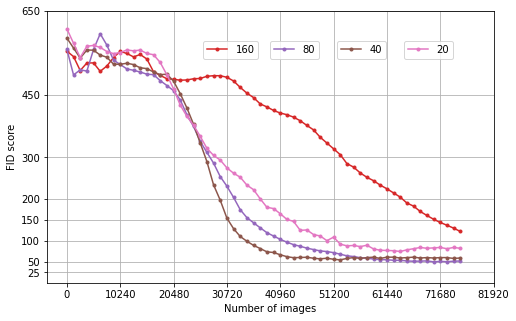

In [339]:
fig = plt.figure()
fig.set_size_inches(8.0, 5.0)
ax4 = fig.add_subplot(111, label="4")
ax5 = fig.add_subplot(111, label="5", frame_on=False)
ax6 = fig.add_subplot(111, label="6", frame_on=False)
ax7 = fig.add_subplot(111, label="7", frame_on=False)

x_axis = [i*1280 for i in range(60)]


ax4.plot(x_axis, metric_df_160_OASIS, marker='.', color='C3')
ax5.plot(x_axis, metric_df_80_OASIS, marker='.', color='C4')
ax6.plot(x_axis, metric_df_40_OASIS, marker='.', color='C5')
ax7.plot(x_axis, metric_df_20_OASIS, marker='.', color='C6')


ax4.set(xlabel="Number of images", ylabel="FID score")
ax4.set_ylim([0,650])
ax5.set_ylim([0,650])
ax6.set_ylim([0,650])
ax7.set_ylim([0,650])

ax4.legend(["160"], loc=(0.35, 0.825))
ax5.legend(["80"], loc=(0.5, 0.825))
ax6.legend(["40"], loc=(0.65, 0.825))
ax7.legend(["20"], loc=(0.8, 0.825))


ax4.grid()
ax5.grid()
ax6.grid()
ax7.grid()

x_axis_ticks = [i*1280*8 for i in range(9)]

ax4.xaxis.set_ticks(x_axis_ticks)
ax5.xaxis.set_ticks(x_axis_ticks)
ax6.xaxis.set_ticks(x_axis_ticks)
ax7.xaxis.set_ticks(x_axis_ticks)


ax4.yaxis.set_ticks([ 650, 450, 300, 200, 150, 100, 50, 25])
ax5.axis('off')
ax6.axis('off')
ax7.axis('off')
plt.show()

In [35]:
import numpy as np
array_1 = np.array([[1.87236130e-01, 4.73944664e-01, 9.04494047e-01], [1.79050848e-01, 2.57736794e-03, 9.98255908e-01]])
array_2 = np.array([[1.87236130e-01, 4.73944664e-01, 9.04494047e-01], [1.79050848e-01, 2.57736794e-03, 9.98255908e-01]])

array_list = []
array_list.append(array_1)
array_list.append(array_2)

print(array_list[0] + array_list[1])

np.argmax(array_list[0] + array_list[1], axis=1)


[[0.37447226 0.94788933 1.80898809]
 [0.3581017  0.00515474 1.99651182]]


array([2, 2], dtype=int64)

In [21]:
import tqdm

exp_dir = r"G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_CLASSIFICATION"

train_dataset_sizes = ["500"]

pretrained_modes = ["pretrained_on_ImageNet", "not_pretrained_on_ImageNet"]

modes_for_pretrained = ["real_data", "real_and_synthetic_data"]

modes_for_not_pretrained = ["real_data", "real_and_synthetic_data"]

fake_dataset_sizes = ["100_perc", "50_perc", "200_perc"]

models = ["StyleGAN2", "StyleGAN2_ADA", "StyleGAN2_DiffAug"]

#train_dir_imgs = os.listdir(os.path.join(exp_dir, "images"))

# for dataset_size in tqdm.tqdm(os.listdir(exp_dir), desc = 'dirs'):
counter = 0

for train_dataset_size in train_dataset_sizes:
    print("train dataset size: " , train_dataset_size)
    for pretrained_mode in pretrained_modes:
        print("   pretrained mode: ", pretrained_mode)
        if pretrained_mode == "pretrained_on_ImageNet":
            data_modes = modes_for_pretrained
        elif pretrained_mode == "not_pretrained_on_ImageNet":
            data_modes = modes_for_not_pretrained
        for data_mode in data_modes:
            print("      data mode: ", data_mode)
            if data_mode == "real_data":
                counter += 1
                print(f"               path: G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_CLASSIFICATION\{train_dataset_size}\{pretrained_mode}\{data_mode}")
                continue
            for fake_dataset_size in fake_dataset_sizes:
                print("         fake_dataset_sizes size: ", fake_dataset_size)
                for model in models:
                    counter += 1
                    print("            model: ", model)
                    print(f"               path: G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_CLASSIFICATION\{train_dataset_size}\{pretrained_mode}\{data_mode}\{fake_dataset_size}\{model}" )

print()
print("counter: ", counter)


    #data_dir = os.path.join
    
    # full_file_name = os.path.join(os.path.join(train_dir, "images"), img)
    # shutil.copy(full_file_name, dest)




train dataset size:  500
   pretrained mode:  pretrained_on_ImageNet
      data mode:  real_data
               path: G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_CLASSIFICATION\500\pretrained_on_ImageNet\real_data
      data mode:  real_and_synthetic_data
         fake_dataset_sizes size:  100_perc
            model:  StyleGAN2
               path: G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_CLASSIFICATION\500\pretrained_on_ImageNet\real_and_synthetic_data\100_perc\StyleGAN2
            model:  StyleGAN2_ADA
               path: G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_CLASSIFICATION\500\pretrained_on_ImageNet\real_and_synthetic_data\100_perc\StyleGAN2_ADA
            model:  StyleGAN2_DiffAug
               path: G:\My Drive\Projektarbeit_ResearchProject\experiments\BUS_classification\BUS_CLASSIFICATION\500\pretrained_on_ImageNet\real_and_synthetic_data\100_perc\StyleGAN2_DiffAug
    